# VISUALIZACION I : Matplotlib

Es el momento de ponernos manos a la obra con la visualización de datos. En este primer ejercicio de pair programming trabajaremos con el csv que generamos en el ejercicio de pair programming de Pandas III, ese en el que habíamos eliminado algunas columnas de nuestro csv.

Hoy realizaremos una serie de gráficas usando la librería de matplotlib para familiarizarnos un poco con los datos.

📌 Para poder solucionar los ejercicios de hoy no solo tendremos que visualizar, también tendremos que usar métodos que hemos aprendido en lecciones anteriores de Pandas como por ejemplo value_counts(), isnull, describe, etc.

Tendréis que realizar gráficas para contestar a las siguientes preguntas:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datos/attacks_pandas3.csv')
df.head()

,case_number,unnamed:_0,year,type,country,area,location,activity,name,sex_,age,time,species_,href
0,2018.06.25,0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.06.18,1,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2018.06.09,2,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,07h45,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
3,2018.06.08,3,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,NaN,2 m shark,http://sharkattackfile.net/spreadsheets/pdf_di...
4,2018.06.04,4,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,NaN,"Tiger shark, 3m",http://sharkattackfile.net/spreadsheets/pdf_di...


### 1. ¿Cuál es la frecuencia de cada una de las categorías de la columna sex?

In [3]:
sex = df['sex_'].value_counts()
sex

M      4939
F       619
M         2
N         2
lli       1
.         1
Name: sex_, dtype: int64

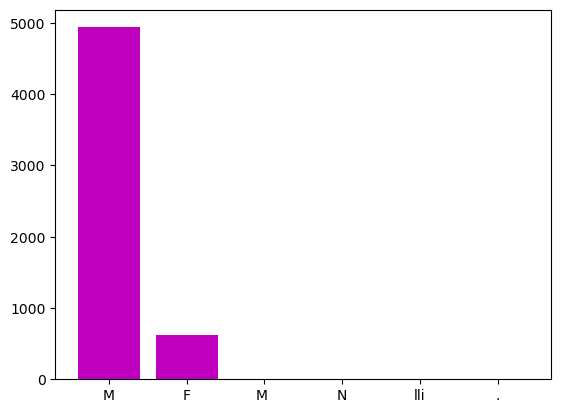

In [4]:
x = sex.values
y = sex.index

plt.figure()
plt.bar(y,x, color = 'm')
plt.show()

### 2. ¿Cuál es el porcentaje de nulos por columna? 

Usa un pie chart donde incluyáis el porcentaje de cada variable en el interior del quesito. Para eso tendréis que usar el parámetro autopct,  algo de documentación.

In [5]:
porcentaje_nulos = df.isnull().sum()
porcentaje_nulos

case_number       1
unnamed:_0        0
year              0
type              4
country          40
area            408
location        488
activity        511
name            200
sex_            550
age            2666
time           3180
species_       2705
href              0
dtype: int64

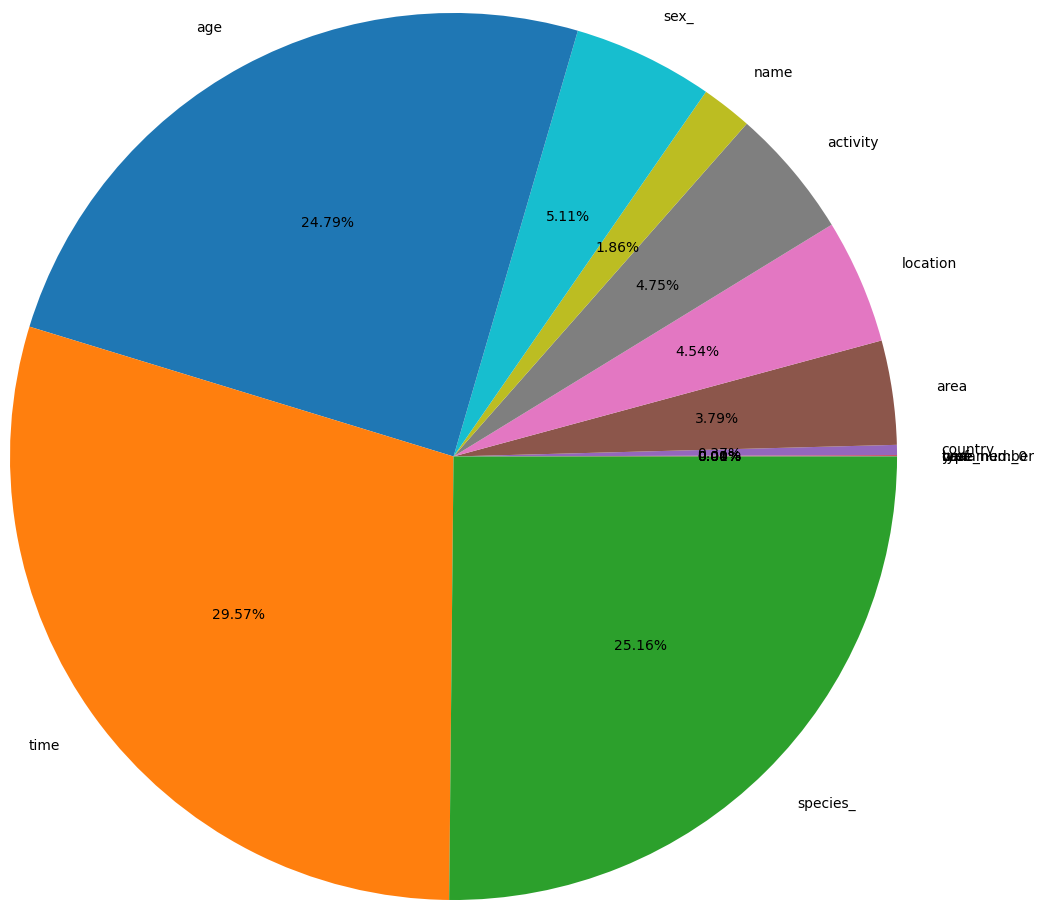

In [6]:
# x es el número de nulos que tiene cada columna del dataframe, e y es el nombre de cada columna. 
# Con autopct(%1.2f%%) le pedimos que nos devuelva los porcentajes.

x = porcentaje_nulos.values
y = porcentaje_nulos.index

plt.figure()
plt.pie(x, labels = y, autopct="%1.2f%%", radius=3)
plt.show()


### 3. ¿Cuál es el número total de valores únicos de cada una de las columnas categóricas del DataFrame?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6114 entries, 0 to 6113
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   case_number  6113 non-null   object 
 1   unnamed:_0   6114 non-null   int64  
 2   year         6114 non-null   float64
 3   type         6110 non-null   object 
 4   country      6074 non-null   object 
 5   area         5706 non-null   object 
 6   location     5626 non-null   object 
 7   activity     5603 non-null   object 
 8   name         5914 non-null   object 
 9   sex_         5564 non-null   object 
 10  age          3448 non-null   object 
 11  time         2934 non-null   object 
 12  species_     3409 non-null   object 
 13  href         6114 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 668.8+ KB


In [8]:
unique = df.describe(include = "object").T
unique

,count,unique,top,freq
case_number,6113,6113,2018.06.25,1
type,6110,8,Unprovoked,4438
country,6074,201,USA,2200
area,5706,791,Florida,1025
location,5626,4020,"New Smyrna Beach, Volusia County",162
activity,5603,1484,Surfing,966
name,5914,5118,male,511
sex_,5564,6,M,4939
age,3448,156,17,154
time,2934,366,Afternoon,183


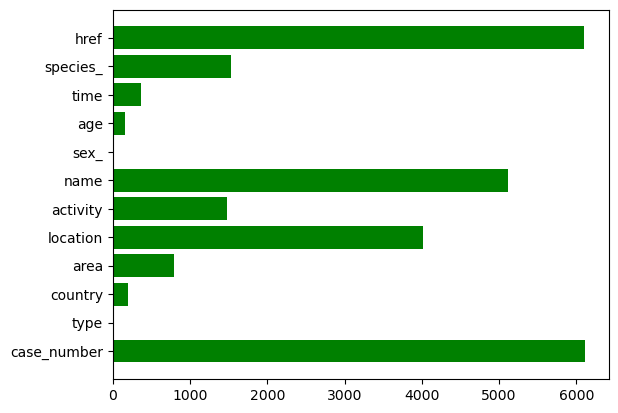

In [9]:
plt.figure()
plt.barh(unique.index, unique["unique"], color = 'g')
plt.show()

### 4. Filtrad los datos para quedarnos solo con los datos de USA.
- ¿Cuántos ataques de tiburones hubo en USA a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.

In [10]:
df_usa = df[(df["country"] == "USA") & (df["year"] > 2000)]
df_usa.head()

,case_number,unnamed:_0,year,type,country,area,location,activity,name,sex_,age,time,species_,href
0,2018.06.25,0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.06.18,1,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2018.06.09,2,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,07h45,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
7,2018.05.27,7,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,NaN,"Lemon shark, 3'",http://sharkattackfile.net/spreadsheets/pdf_di...
8,2018.05.26.b,8,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,17h00,"Bull shark, 6'",http://sharkattackfile.net/spreadsheets/pdf_di...


In [11]:
ataques_2000 = df_usa["year"].value_counts()
ataques_2000

2015.0    73
2007.0    66
2014.0    65
2017.0    65
2016.0    64
2012.0    63
2008.0    60
2013.0    59
2001.0    58
2003.0    57
2006.0    54
2005.0    52
2002.0    49
2011.0    48
2009.0    41
2010.0    40
2004.0    35
2018.0    10
Name: year, dtype: int64

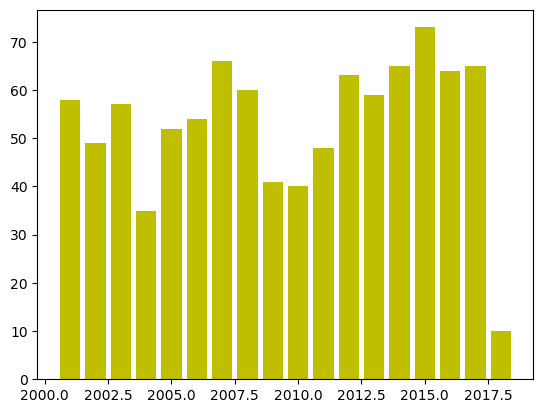

In [12]:
x = ataques_2000.values
y = ataques_2000.index

plt.figure()
plt.bar(y,x, color = "y")
plt.show()


- En función del tipo, ¿cuántos ataques de tiburones de cada tipo hubo en USA? Muestra los resultados en un gráfico de línea.

In [13]:
ataques_tipo = df_usa["type"].value_counts()
ataques_tipo

Unprovoked      797
Invalid          65
Provoked         60
Boating          32
Boat              3
Sea Disaster      2
Name: type, dtype: int64

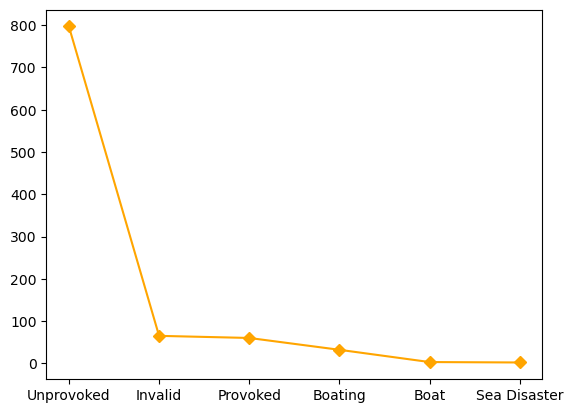

In [14]:
x = ataques_tipo.values
y = ataques_tipo.index

plt.figure()
plt.plot(y,x, color = "orange", marker="D")
plt.show()


### 5. Filtrad los datos para Spain:
- ¿Cuántos ataques de tiburones hubo en España a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.

In [15]:
df_spain = df[(df["country"] == "SPAIN") & (df["year"] > 2000)]
df_spain.head()

,case_number,unnamed:_0,year,type,country,area,location,activity,name,sex_,age,time,species_,href
82,2017.09.16.b,82,2017.0,Unprovoked,SPAIN,Canary Islands,Gran Canaria,Body surfing,male,M,13,NaN,"Porbeagle, 1.5 m",http://sharkattackfile.net/spreadsheets/pdf_di...
98,2017.08.26.b,98,2017.0,Invalid,SPAIN,Castellón,Grao de Moncofa,Swimming,female,F,11,Midday,Shark involvement questionable,http://sharkattackfile.net/spreadsheets/pdf_di...
113,2017.07.23.a,113,2017.0,Unprovoked,SPAIN,Majorca,"Estanys Beach, Colonia de Sant",Swimming,female,F,NaN,Afternoon,Blue shark 6',http://sharkattackfile.net/spreadsheets/pdf_di...
130,2017.06.17,130,2017.0,Unprovoked,SPAIN,Ibiza Island,Playa den Bossa,Swimming,male,M,82,12h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
233,2016.07.29,234,2016.0,Unprovoked,SPAIN,Alicante Province,Arenales del Sol,Swimming,male,M,40,11h30,Blue shark,http://sharkattackfile.net/spreadsheets/pdf_di...


In [16]:
ataques_2000_spain = df_spain["year"].value_counts()
ataques_2000_spain

2017.0    4
2014.0    4
2016.0    2
2015.0    2
2013.0    1
2010.0    1
2009.0    1
2006.0    1
Name: year, dtype: int64

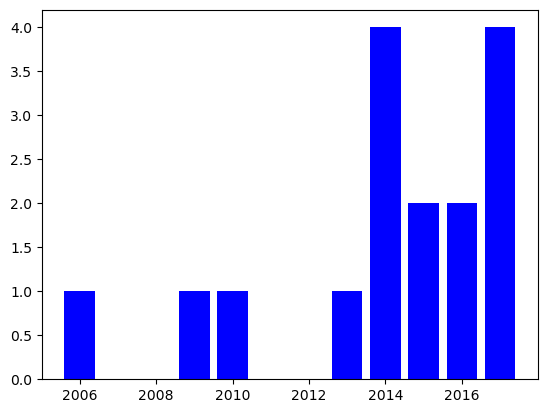

In [17]:
x = ataques_2000_spain.values
y = ataques_2000_spain.index

plt.figure()
plt.bar(y,x, color = "b")
plt.show()

- En función del tipo, ¿cuántos ataques de cada tipo de tiburones hubo en España? Muestra los resultados en un gráfico de línea.

In [18]:
ataques_tipo_spain = df_spain["type"].value_counts()
ataques_tipo_spain

Unprovoked    9
Invalid       5
Provoked      2
Name: type, dtype: int64

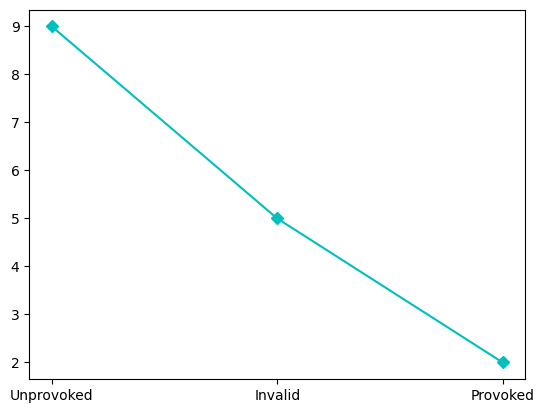

In [20]:
x = ataques_tipo_spain.values
y = ataques_tipo_spain.index

plt.figure()
plt.plot(y,x, color = "c", marker="D")
plt.show()

Happy coding 🦈